## Cosmic Body Temperature

Since the Big Bang, the Universe has been gradually cooling and expanding. After approximately 400,000 years, it cooled enough (although still at around 3000 degrees Celsius) for the simplest atoms to form, causing it to become transparent. The light emitted during this period has been traveling through space ever since, and we can detect it all around us, both on Earth and in space. This afterglow of the Big Bang is known as the Cosmic Microwave Background (CMB).


The expansion of the Universe has stretched out the CMB radiation by around 1000 times, which makes it look much cooler. So instead of seeing the afterglow at 3000 degrees, we see it at just 3o above absolute zero, or 3 Kelvin (-270o C). Just as a burning coal (around 1500 K) glows red, and a hot bright star (around 6000 K) glows yellow or blue, the CMB glow with a characteristic colour associated with it’s temperature. However, because it is so cold, the light which was emitted by the glowing Universe now has a much longer wavelength than we can see with our eyes. The CMB is brightest at a wavelength of around 2 mm, which is around 4000 times longer than the wavelength of the visible light we see with our eyes.

## Planck’s Function

The Planck function provides a mathematical description of the spectrum of the light emitted by blackbodies. In terms of the emitted flux per unit frequency interval per unit steradian, the Planck function is given by

$B_{T}(\nu) = \frac{2h}{c^{2}}\frac{{\nu}^{3}}{e^{\frac{h\nu}{kT}} - 1}  $

where: h = 6.626 × 10−34
J s = 6.626 × 10−27
erg s is Planck’s constant, k = 1.38 × $10^{−23}$ J $K^{-1}$= 1.38 × $10^{−16}$ ergs $K^{−1}$ is Boltzmann’s constant, c is the speed of light,
$\nu$ is the frequency of the observation,
T is the temperature of the radiating body in Kelvins.

## Curve Fitting

We will use far infrared data adapted from the COBE satellite to fit a blackbody curve to the CMB. We read the file into python and make a plot showing the brightness as a function of frequency. Knowing that it is a blackbody spectrum, we will fit the blackbody function to the data with temperature as the free parameter

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit

In [5]:
cmbdata = ascii.read('COBE_CMB_data.txt') #Reading the data

In [6]:
cmbdata #Loading the data

frequency (Hz),brightness (ergs/s/cm^2/sr/Hz)
float64,float64
34473577711.372055,7.029471536390586e-16
42896956937.69582,1.0253178228238486e-15
51322332225.44733,1.3544045476166584e-15
60344529880.18272,1.6902073280174815e-15
68767909106.5062,2.0125779972022745e-15
77780126454.10146,2.3148004995630144e-15
...,...
489996752265.52826,3.201319839821188e-16
506039097962.6759,2.5968748350997043e-16


We see that the data contains Frequency and Brightness data.

In [7]:
brightness = cmbdata['brightness (ergs/s/cm^2/sr/Hz)']
freq = cmbdata['frequency (Hz)']

In [12]:
def blackbody(frequency, temperature, scale):   #Defining the Planck's function given below
    h = 6.62607015e-34  # Planck constant in J*s
    k = 1.380649e-23    # Boltzmann constant in J/K
    c = 2.998e8         # Speed of light in m/s

    return scale * (2* h * frequency**3 / c**2) * (1 / (np.exp(h * frequency / (k * temperature)) - 1))

popt (Optimal Parameters):
popt is a 1-dimensional NumPy array that contains the optimal values of the parameters obtained from the curve fitting process. In this case, since the blackbody function is being used, popt will contain two elements: the fitted temperature (temperature_fit) and the fitted scale (scale_fit). The order of these elements in the array corresponds to the order of the parameters in the blackbody function.

pcov (Covariance Matrix):
pcov is a 2-dimensional NumPy array that represents the estimated covariance of the parameters in popt. The diagonal elements of pcov represent the variances of the fitted parameters (squared standard deviations), and the off-diagonal elements represent the covariances between the parameters.

The covariance matrix is useful in determining the uncertainties and correlations between the fitted parameters.

In [15]:
popt, pcov = curve_fit(blackbody, freq, brightness)

# Extract the fitted temperature and scale from the 'popt' array
# The 'popt' array is expected to contain the fitted temperature at index 0 and the fitted scale at index 11
temperature_fit, scale_fit = popt

# Print the fitted temperature and scale obtained from the curve fitting
print("Fitted Temperature:", temperature_fit)
print("Fitted Scale:", scale_fit)

Fitted Temperature: 2.7514377670818373
Fitted Scale: 981.191601790195


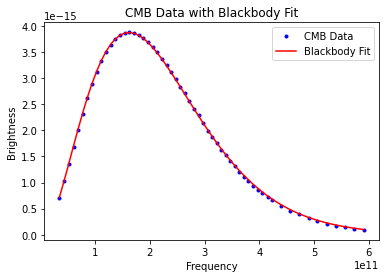

In [16]:
# Plot the CMB data points as blue dots ('b.') with a label 'CMB Data'
plt.plot(freq, brightness, 'b.', label='CMB Data')

# Plot the fitted blackbody function using the provided 'temperature_fit' and 'scale_fit' parameters as a red line ('r') with no dots
plt.plot(freq, blackbody(freq, temperature_fit, scale_fit), 'r', label='Blackbody Fit')
# Add labels to the x and y axes
plt.xlabel('Frequency')
plt.ylabel('Brightness')
# Add a title to the plot
plt.title('CMB Data with Blackbody Fit')
# Display a legend, which will show labels for each plot (CMB Data and Blackbody Fit) in the plot
plt.legend()
# Display the plot
plt.show()


The plot displays the CMB data points (in blue) along with the blackbody fit (in red) obtained using the blackbody function. The blackbody fit provides a good fit to the CMB data, allowing us to determine the fitted temperature and scale. The temperaturef it represents the fitted temperature of the CMB, and scalef it corresponds to the scale factor applied to the blackbody function to match the data.


Using the blackbody function, we get the optimized CMB temperature to be 2.75 Kelvin